In [ ]:
#still doing data cleaning to try to find out how to make this more acccurate!

In [381]:
# scipy
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# statsmodels
import statsmodels
# scikit-learn
import sklearn
# theano
#import theano
# tensorflow
import tensorflow
# keras
from tensorflow import keras
#seaborn
import seaborn

In [382]:
#DATA PREPROCESSING

In [383]:
# first neural network with keras tutorial
from numpy import loadtxt

In [384]:
#import pitch data 
#load the dataset
at_bats = pandas.read_csv('2019_atbats.csv')
pitches = pandas.read_csv('2019_pitches.csv')

#combine the data so at bat result is included as well
pitches = pitches.merge(at_bats, on='ab_id')

In [385]:
#remove columns of variables that are not directly controllable/not directly involved in pitch calling process

pitches = pitches.drop(columns = ['start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'outs', 'pfx_x'])
pitches = pitches.drop(columns =['code', 'zone', 'type_confidence', 'ab_id', 'g_id', 'nasty', 'break_y', 'event_num', 'pfx_z'])
pitches = pitches.drop(columns =['vx0', 'vy0', 'vz0', 'x0', 'y0', 'z0', 'sz_bot', 'sz_top', 'ax', 'ay', 'az', 'x', 'y'])
pitches

,px,pz,type,pitch_type,b_score,b_count,s_count,pitch_num,on_1b,on_2b,on_3b,inning,top,p_score,batter_id,pitcher_id,stand,p_throws,event,o
0,0.00,2.15,X,FF,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,594777,571666,L,R,Flyout,1
1,0.34,2.31,C,FF,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,545361,571666,R,R,Flyout,2
2,-0.05,2.03,S,SL,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,545361,571666,R,R,Flyout,2
3,0.49,0.92,B,CH,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,545361,571666,R,R,Flyout,2
4,-0.13,1.11,B,CH,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,545361,571666,R,R,Flyout,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728785,0.30,1.99,X,FF,1.0,2.0,0.0,4.0,0.0,0.0,0.0,9.0,1.0,4.0,622110,571704,R,R,Groundout,2
728786,1.00,-0.38,B,SL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,4.0,605421,571704,L,R,Strikeout,3
728787,0.36,2.02,C,FF,1.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,1.0,4.0,605421,571704,L,R,Strikeout,3
728788,-0.26,2.60,C,SL,1.0,1.0,0.0,3.0,0.0,0.0,0.0,9.0,1.0,4.0,605421,571704,L,R,Strikeout,3


In [386]:
#remove each pitch where pitch type was not recorded
pitches = pitches[pitches.pitch_type != False]
pitches = pitches.dropna()
pitches = pitches.drop(columns = ['batter_id', 'pitcher_id'])

#remove each pitch where the inning ending outs were runner involved outs
pitches = pitches[pitches.event != 'Caught Stealing 2B'] 
pitches = pitches[pitches.event != 'Caught Stealing 3B'] 
pitches = pitches[pitches.event != 'Caught Stealing Home'] 
pitches = pitches[pitches.event != 'Pickoff Caught Stealing 2B']
pitches = pitches[pitches.event != 'Pickoff Caught Stealing Home']
pitches = pitches[pitches.event != 'Pickoff Caught Stealing 3B']
pitches = pitches[pitches.event != 'Pickoff 1B']
pitches = pitches[pitches.event != 'Pickoff Error 1B']
pitches = pitches[pitches.event != 'Pickoff 2B']
pitches = pitches[pitches.event != 'Pickoff 3B']
pitches = pitches[pitches.event != 'Batter Interference']
pitches = pitches[pitches.event != 'Catcher Interference']
pitches = pitches[pitches.event != 'Fan Interference']
pitches = pitches[pitches.event != 'Wild Pitch']
pitches = pitches[pitches.event != 'Runner Out']
pitches = pitches[pitches.event != 'Game Advisory']
pitches = pitches[pitches.event != 'Passed Ball']
pitches = pitches[pitches.event != 'Stolen Base 2B']

In [387]:
pitches = pitches.replace(['Triple Play', 'Runner Double Play', 'Sac Fly Double Play', 'Bunt Lineout', 'Bunt Pop Out', 'Bunt Groundout', 'Field Error', 'Strikeout Double Play', 'Double Play', 'Sac Bunt Double Play', 'Forceout', 'Flyout', 'Strikeout', 'Groundout', 'Pop Out', 'Lineout', 'Fielders Choice Out', 'Grounded Into DP', "Fielders Choice"], 1)
pitches = pitches.replace(['Intent Walk', 'Sac Bunt', 'Single', 'Double', 'Hit By Pitch', 'Walk', 'Triple', 'Home Run', 'Sac Fly'], 0)
pitches[pitches.event.apply(isinstance, args=(str,))]


,px,pz,type,pitch_type,b_score,b_count,s_count,pitch_num,on_1b,on_2b,on_3b,inning,top,p_score,stand,p_throws,event,o


In [388]:
#move event column to the end for variable definition purposes
event = pitches.pop("event")

# insert column with insert(location, column_name, column_value)
cols = len(pitches.columns)
pitches.insert(cols, "event", event)

pandas.set_option('display.max_columns', None)
print(pitches.head())

x = pitches.iloc[:, 0:cols].values
y = pitches.iloc[:, cols].values

     px    pz type pitch_type  b_score  b_count  s_count  pitch_num  on_1b  \
0  0.00  2.15    X         FF      0.0      0.0      0.0        1.0    0.0   
1  0.34  2.31    C         FF      0.0      0.0      0.0        1.0    0.0   
2 -0.05  2.03    S         SL      0.0      0.0      0.0        2.0    0.0   
3  0.49  0.92    B         CH      0.0      0.0      1.0        3.0    0.0   
4 -0.13  1.11    B         CH      0.0      1.0      1.0        4.0    0.0   

   on_2b  on_3b  inning  top  p_score stand p_throws  o  event  
0    0.0    0.0     1.0  1.0      0.0     L        R  1      1  
1    0.0    0.0     1.0  1.0      0.0     R        R  2      1  
2    0.0    0.0     1.0  1.0      0.0     R        R  2      1  
3    0.0    0.0     1.0  1.0      0.0     R        R  2      1  
4    0.0    0.0     1.0  1.0      0.0     R        R  2      1  


In [389]:
#Encode String Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#encode batter handedness
labelencoder_X_neg2 = LabelEncoder()
x[:, -2] = labelencoder_X_neg2.fit_transform(x[:, -2])

#encode pitcher handedness
labelencoder_X_neg3 = LabelEncoder()
x[:, -3] = labelencoder_X_neg3.fit_transform(x[:, -3])
print(x)


[[0.0 2.15 'X' ... 0 1 1]
 [0.34 2.31 'C' ... 1 1 2]
 [-0.05 2.03 'S' ... 1 1 2]
 ...
 [0.36 2.02 'C' ... 0 1 3]
 [-0.26 2.6 'C' ... 0 1 3]
 [0.22 1.06 'S' ... 0 1 3]]


In [390]:
#use onehotencoder for dummy variables (type and pitch_type)
from sklearn.compose import ColumnTransformer
# Type column
ct = ColumnTransformer([("type", OneHotEncoder(), [2])], remainder = 'passthrough')
x = ct.fit_transform(x)

ct3 = ColumnTransformer([("pitch_type", OneHotEncoder(), [-14])], remainder = 'passthrough')
x = ct3.fit_transform(x)

In [391]:
x

array([[0.0, 0.0, 0.0, ..., 0, 1, 1],
       [0.0, 0.0, 0.0, ..., 1, 1, 2],
       [0.0, 0.0, 0.0, ..., 1, 1, 2],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 1, 3],
       [0.0, 0.0, 0.0, ..., 0, 1, 3],
       [0.0, 0.0, 0.0, ..., 0, 1, 3]], dtype=object)

In [392]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [393]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [394]:
#NEURAL NETWORK

In [395]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [396]:
#Initializing Neural Network
classifier = Sequential()

In [397]:
cols = len(x[0])
print(cols)

43


In [398]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, activation = 'relu', input_dim = cols))
# Adding the second hidden layer
classifier.add(Dense(6, activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [399]:
# Compiling Neural Network
# our dependent variable has more than 2 categories in output so use ‘categorical_crossentropy’
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [400]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [401]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [402]:
cm

array([[26687, 21372],
       [61515, 34574]])

In [403]:
import matplotlib.pyplot as plt

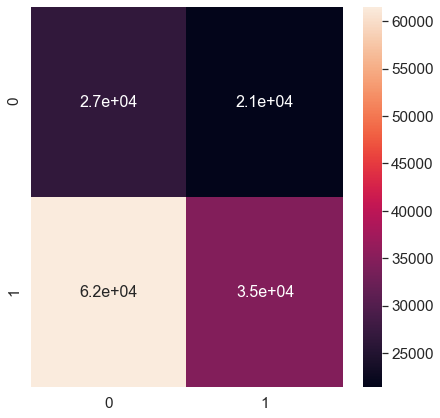

In [404]:
array = cm

df_cm = pandas.DataFrame(array, range(2), range(2))
seaborn.set(font_scale=1.4) # for label size
plt.figure(figsize = (7,7))
seaborn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()